### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Import data

In [2]:
path = r'C:\Users\goswa\Desktop\Pratham project folder 6'

In [5]:
df_UFC = pd.read_csv(r'C:\Users\goswa\Desktop\Pratham project folder 6\Prepared data\UFC Clean.csv', index_col = False)

In [6]:
df_UFC.shape

(4954, 32)

In [7]:
# Check matplot version
matplotlib.__version__

'3.7.2'

In [8]:
# Display visuals 
%matplotlib inline

In [9]:
df_UFC.head()

,R_fighter,B_fighter,fight_date,location,Winner,weight_class,B_wins,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,Bantamweight,1,1,0,0,...,0,1,0,0,Orthodox,170.18,177.80,135,31,27
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,Middleweight,2,0,0,1,...,0,3,0,0,Orthodox,182.88,187.96,185,32,28
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,Heavyweight,0,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264,32,28
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenStrawweight,0,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115,28,25
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,WomenBantamweight,4,1,0,0,...,1,2,2,0,Orthodox,167.64,172.72,135,29,43


# Narrow down variables 

In [17]:
df_low = df_UFC[['B_wins','R_wins','R_Height_cms','B_Height_cms','R_Reach_cms','B_Reach_cms','R_Weight_lbs','B_Weight_lbs','B_age','R_age']]

In [18]:
df_low.head(10)

,B_wins,R_wins,R_Height_cms,B_Height_cms,R_Reach_cms,B_Reach_cms,R_Weight_lbs,B_Weight_lbs,B_age,R_age
0,1,1,170.18,165.10,177.80,170.18,135,135,31,27
1,2,4,182.88,187.96,187.96,193.04,185,205,32,28
2,0,4,187.96,187.96,190.50,190.50,264,241,32,28
3,0,0,160.02,152.40,160.02,154.94,115,115,28,25
4,4,5,167.64,180.34,172.72,182.88,135,135,29,43
5,4,7,182.88,177.80,190.50,182.88,155,145,27,41
6,4,4,182.88,180.34,180.34,193.04,170,170,35,31
7,8,12,185.42,190.50,195.58,205.74,185,185,28,37
8,0,3,177.80,170.18,190.50,177.80,135,135,29,28
9,3,0,165.10,167.64,172.72,167.64,125,125,28,27


# Qustion 3 Heat Map

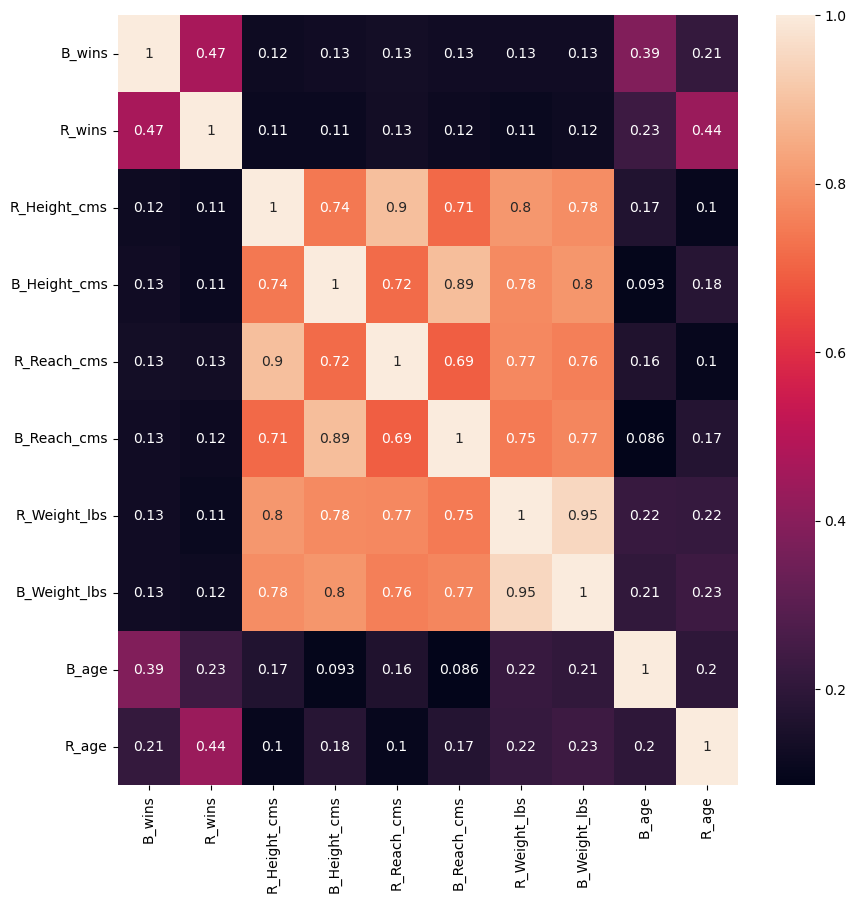

In [19]:
# Create subplot
f,ax = plt.subplots(figsize=(10,10))

# Create heat map
corr_1 = sns.heatmap(df_low.corr(), annot = True, ax = ax)

 The variables are very miss matched but it is interesting to see how well they try to match up opponents. As you can see Blue weight and Red weight have an incredibly strong correlation, even more nuanced things like how red's reach in cs is strongly linked to blue's reach in cms. However I was surprised to see how things that I assumed would lead to a much higher chance of winning didn't actually do so for example, I would have assumed more reach and hight would lead to some higher win rate amongst red or blues history however there seems to be no such link.

# Question 4 Scatterplot

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


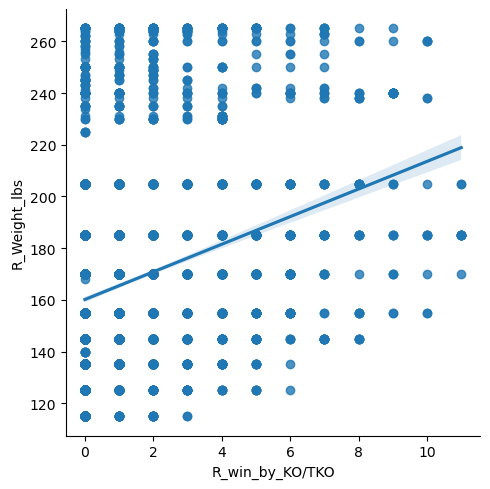

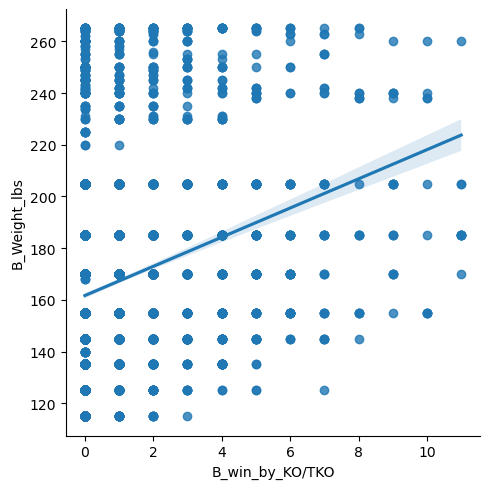

In [21]:
# Creat scatterplot comparing win by TKO/KO and weight
sns.lmplot(x = 'R_win_by_KO/TKO', y = 'R_Weight_lbs', data = df_UFC)
sns.lmplot(x = 'B_win_by_KO/TKO', y = 'B_Weight_lbs', data = df_UFC)

Weight seems to have no noticable affect on TKO or KO.  

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


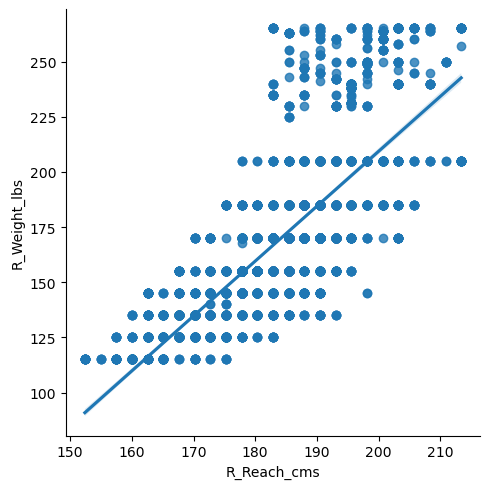

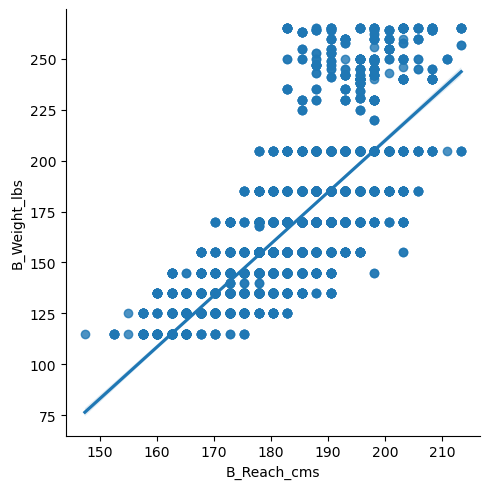

In [23]:
# Creat scatterplot comparing weight and reach
sns.lmplot(x = 'R_Reach_cms', y = 'R_Weight_lbs', data = df_UFC)
sns.lmplot(x = 'B_Reach_cms', y = 'B_Weight_lbs', data = df_UFC)

Weight and reach seem to have a strong posative corelation 

# Question 5  Pair Plot 


In [26]:
#creat data set with more relivant variables 
df_sub = df_low[['B_wins','R_wins','B_age','R_age','R_Height_cms','B_Height_cms']]

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

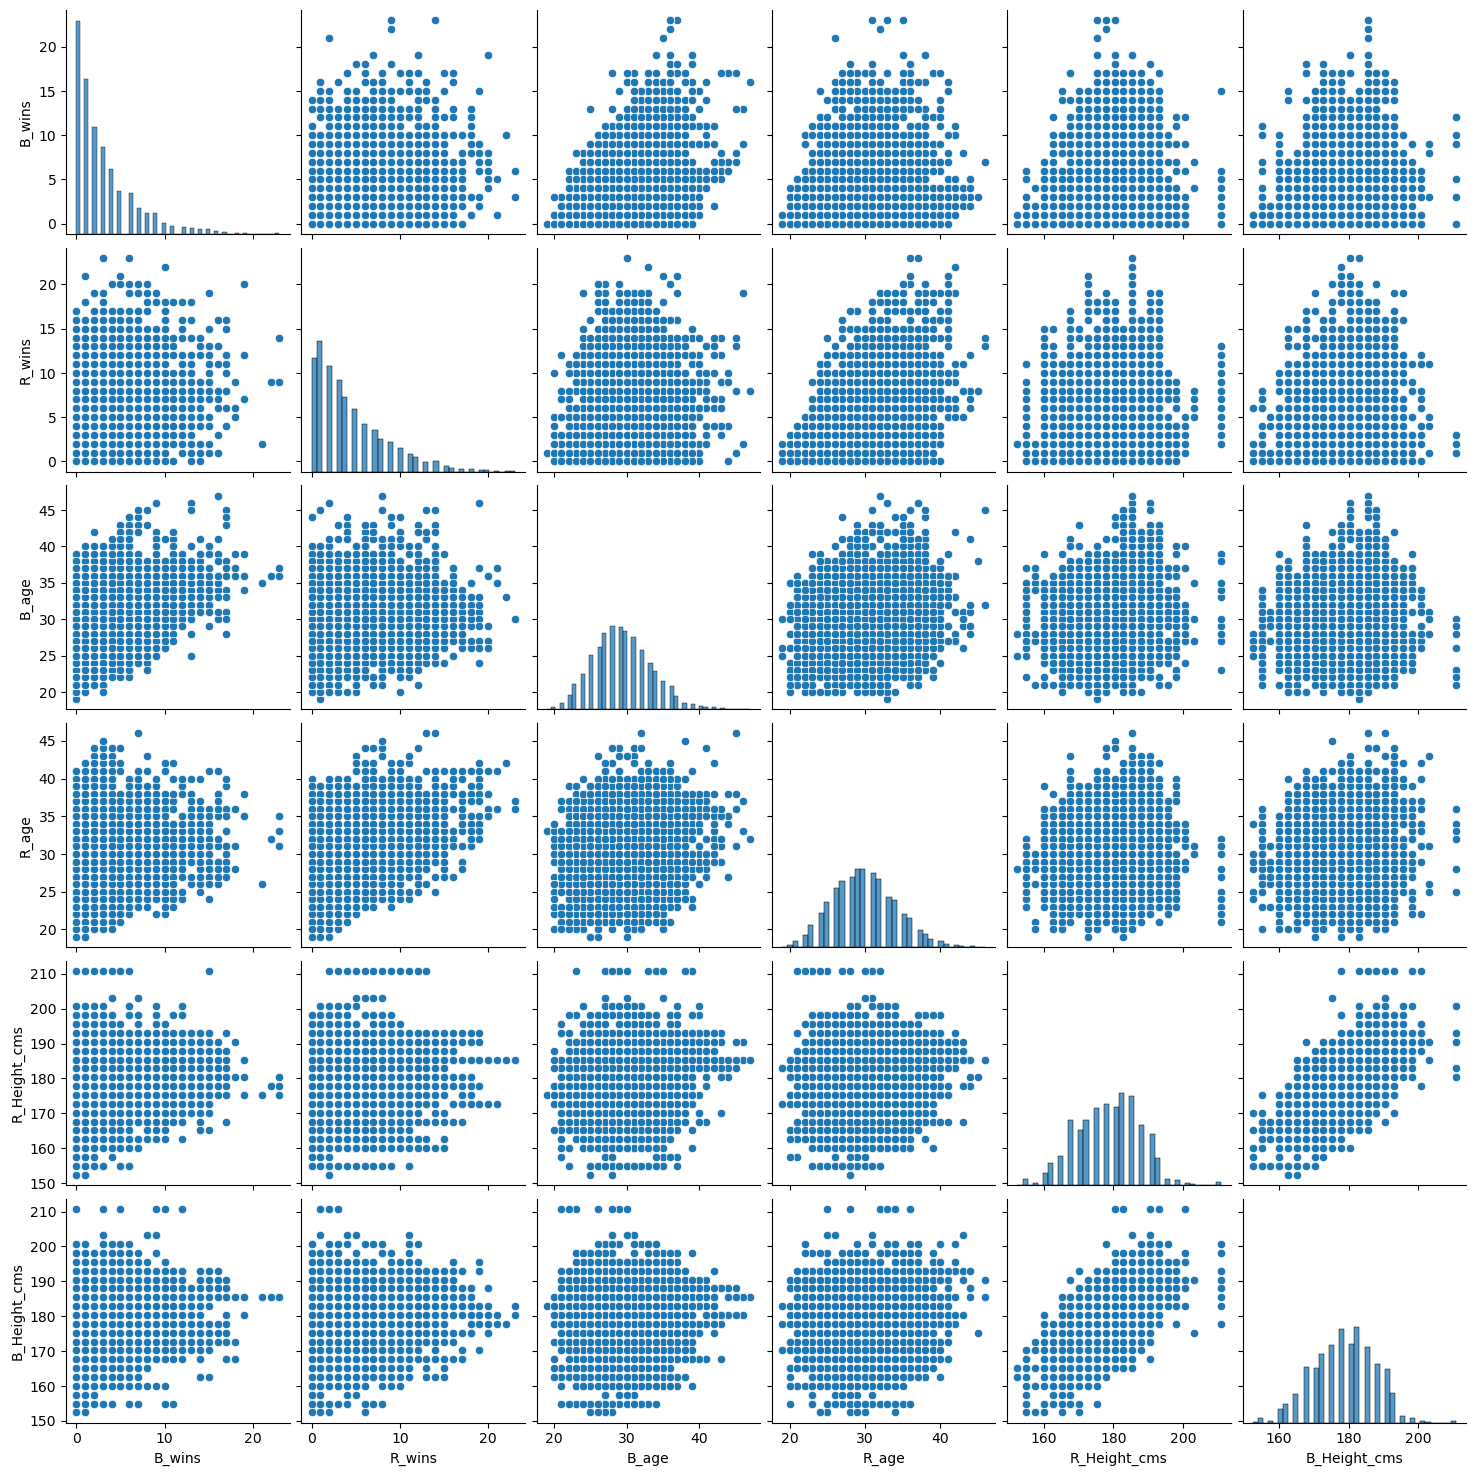

In [28]:
g = sns.pairplot(df_sub)

Most variables have no real link once again, however some interesting things that stuck out to me were how blue's past wins have a slight inrease with Red's age and vice versa. I think that could be worth looking into 

# Question 6 Categorical Plots

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='B_Weight_lbs', ylabel='Count'>

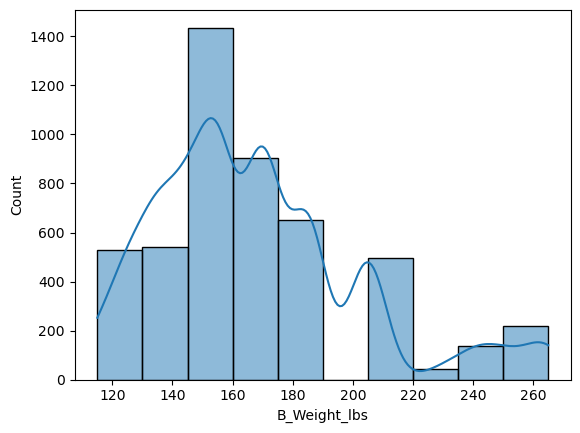

In [31]:
sns.histplot(df_low['B_Weight_lbs'], bins = 10, kde = True)

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='R_Weight_lbs', ylabel='Count'>

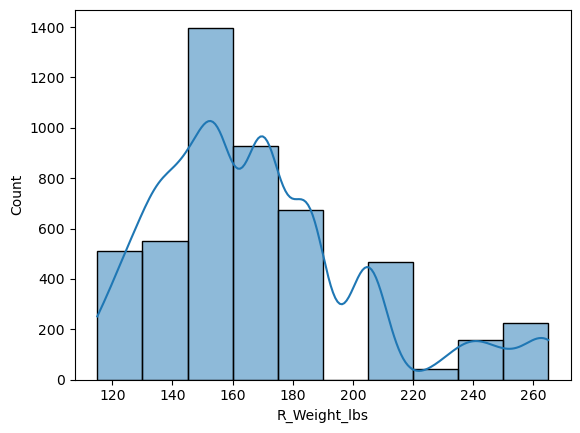

In [32]:
sns.histplot(df_low['R_Weight_lbs'], bins = 10, kde = True)

In [43]:
df_low = df_low.copy()
df_low.loc[(df_low['B_Weight_lbs'] >= 0) & (df_low['B_Weight_lbs'] <= 125), 'Weight'] = 'Flyweight'

In [38]:
df_low.loc[(df_low['B_Weight_lbs'] > 125) & (df_low['B_Weight_lbs'] <= 135), 'Weight'] = 'Bantamweight'

In [39]:
df_low.loc[(df_low['B_Weight_lbs'] > 135) & (df_low['B_Weight_lbs'] <= 145), 'Weight'] = 'Featherweight'

In [40]:
df_low.loc[(df_low['B_Weight_lbs'] > 145) & (df_low['B_Weight_lbs'] <= 155), 'Weight'] = 'Lightweight'

In [41]:
df_low.loc[(df_low['B_Weight_lbs'] > 155) & (df_low['B_Weight_lbs'] <= 170), 'Weight'] = 'Welterweight'

In [42]:
df_low.loc[(df_low['B_Weight_lbs'] > 170) & (df_low['B_Weight_lbs'] <= 185), 'Weight'] = 'Middleweight'

In [44]:
df_low.loc[(df_low['B_Weight_lbs'] > 185) & (df_low['B_Weight_lbs'] <= 205), 'Weight'] = 'Light Heavyweight'

In [45]:
df_low.loc[(df_low['B_Weight_lbs'] > 205) & (df_low['B_Weight_lbs'] <= 290), 'Weight'] = 'Heavyweight'

In [47]:
df_low['Weight'].value_counts(dropna = False)

Weight
Middle Weight        1558
Middleweight          879
Welterweight          566
Lightweight           530
Flyweight             529
Light Heavyweight     494
Heavyweight           398
Name: count, dtype: int64

In [50]:
df_low = df_low[df_low['Weight'] != 'Middle Weight']

In [51]:
df_low['Weight'].value_counts(dropna = False)

Weight
Middleweight         879
Welterweight         566
Lightweight          530
Flyweight            529
Light Heavyweight    494
Heavyweight          398
Name: count, dtype: int64

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

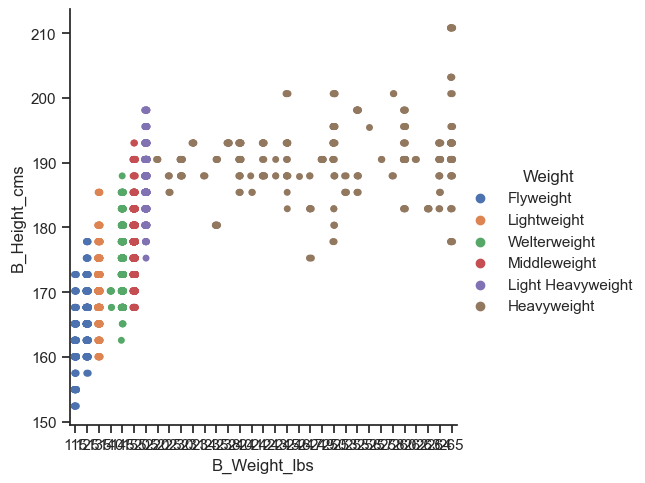

In [58]:
sns.set(style="ticks")
g = sns.catplot(x="B_Weight_lbs", y="B_Height_cms", hue="Weight", data=df_low)

Both the blue and red side have a near identical weight distribution however the blue side actually has a higher count of 150-160 weight fighters than the red side does. This may aslo help indicate what weight category is the most popular to watch or would have the most contestants so that is something to look more into in future analysis. 

# Question 7

Thought all the graphs I created today it is clear that the matches are made to be as fair as possible by pairing like weight, hight, and reach combatents however most of my questions I asked last time would be much easier to decypher on excel as it would allow me to more acuratley compare which corner won red or blue due to it being easier to compare non linear data in excel based off how the data is already set.

# Question 8

At this point I would like to figure out questions such as how is the corelation between a hgiht advantage and likelyhood of wining the current match. Or how a weight advantage plays an affect into the current match. I would like to test the correlation on these questions. 